<a href="https://colab.research.google.com/github/thisishasan/slda/blob/main/assignment_bigdata_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment No. 01

## Course: Hardware & Software For Bigdata Module B
## Student Name: Muhammad Hasan
## Student ID: D03000134

### Data Description

In [6]:
import json
from collections import Counter, defaultdict

# Load the JSON file
with open('tematiche_sedi.json', 'r') as f:
    data = json.load(f)

# --- 1. Define the structure of the dataset ---
print("=== Structure of the Dataset ===")
if 'nodi' in data and isinstance(data['nodi'], list):
    print("Top-level key: 'nodi' -> list of nodes")
    print("Each node has the following structure:")
    example_node = data['nodi'][0]
    for key, value in example_node.items():
        print(f"  - {key}: {type(value).__name__} (example: {value[0] if isinstance(value, list) else value})")
else:
    print("Unexpected structure in JSON")

# --- 2. Describe the dataset content ---
nodes = data['nodi']
total_nodes = len(nodes)

# Initialize containers
livello1_counter = Counter()
livello2_counter = Counter()
livello1_to_nodes = defaultdict(list)
livello2_to_nodes = defaultdict(list)

# Process each node
for node in nodes:
    nodo_name = node['nodo']

    for l1 in node.get('livello1', []):
        livello1_counter[l1] += 1
        livello1_to_nodes[l1].append(nodo_name)

    for l2 in node.get('livello2', []):
        livello2_counter[l2] += 1
        livello2_to_nodes[l2].append(nodo_name)

# Display dataset overview
print(f"\n=== Dataset Overview ===")
print(f"Total number of nodes: {total_nodes}")

print("\nUnique 'livello1' themes and their counts:")
for theme, count in livello1_counter.most_common():
    print(f"  {theme}: {count} nodes")

print("\nUnique 'livello2' themes and their counts:")
for theme, count in livello2_counter.most_common():
    print(f"  {theme}: {count} nodes")

# Example: Find which nodes cover a specific 'livello2' theme
example_theme = "Digital Twin"
nodes_with_theme = livello2_to_nodes.get(example_theme, [])
print(f"\nNodes with the theme '{example_theme}': {nodes_with_theme}")


=== Structure of the Dataset ===
Top-level key: 'nodi' -> list of nodes
Each node has the following structure:
  - nodo: str (example: Aquila)
  - livello1: list (example: Electronic System Design)
  - livello2: list (example: Systems: Electronic System-Level HW/SW Co-Design)

=== Dataset Overview ===
Total number of nodes: 24

Unique 'livello1' themes and their counts:
  Computers and information processing: 15 nodes
  Industry applications: 6 nodes
  Electronic System Design: 5 nodes
  Control systems: 3 nodes
  control systems: 1 nodes

Unique 'livello2' themes and their counts:
  Systems: Electronic System-Level HW/SW Co-Design: 1 nodes
  AI-based decision support systems: 1 nodes
  Smart sensors for autonomous system and environmental monitoring: 1 nodes
  Communications / architecture and protocols for IoT and edge computing: 1 nodes
  Communications / machine (deep) learning applications for IoT: 1 nodes
  Communications: architecture and protocols for IoT: 1 nodes
  Cloud conti

### Data Visualization By Location

<ipython-input-7-be9c09a044f9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(theme_counts), y=list(nodos), palette="viridis")


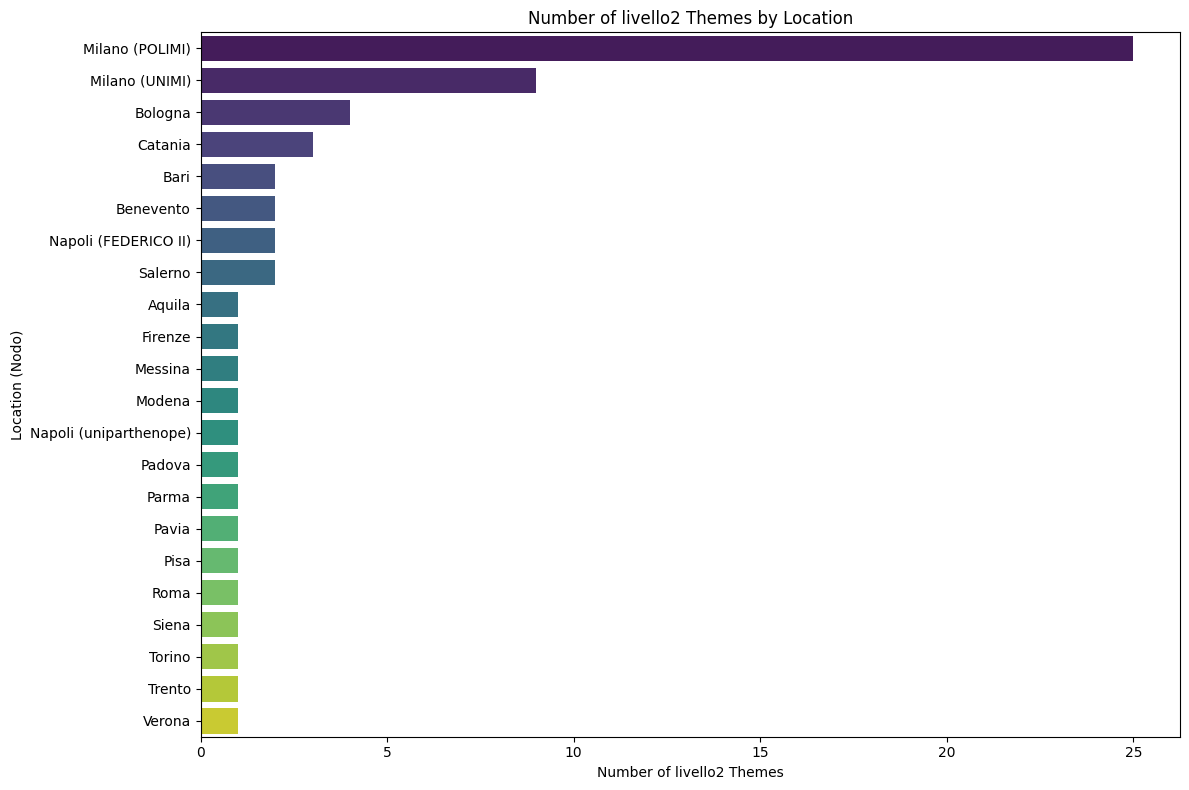

In [7]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of livello2 themes per location (nodo)
nodo_theme_count = {}

for node in data['nodi']:
    nodo = node['nodo']
    livello2 = node.get('livello2', [])
    nodo_theme_count[nodo] = len(livello2)

# Sort by number of themes
sorted_nodes = sorted(nodo_theme_count.items(), key=lambda x: x[1], reverse=True)

# Unzip into two lists
nodos, theme_counts = zip(*sorted_nodes)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x=list(theme_counts), y=list(nodos), palette="viridis")
plt.xlabel('Number of livello2 Themes')
plt.ylabel('Location (Nodo)')
plt.title('Number of livello2 Themes by Location')
plt.tight_layout()
plt.show()
